## EE 242 Lab 1a – Modifying Signals - Sampling and Amplifying

**Author names go here , Team XXYY**

This lab has 2 exercises to be completed as a team. Each should be given a separate code cell in your Notebook, followed by a markdown cell with report discussion. Your notebook should start with a markdown title and overview cell, which should be followed by an import cell that has the import statements for all assignments. For this assignment, you will need to import: numpy, the wavfile package from scipy.io, and matplotlib.pyplot.  

In [1]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import scipy.signal as sig
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import IPython
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of different amplitude and time operations on signals.  This is a two-week lab.  You should plan on completing the first 2 assignments in the first week.

## Lab 1a turn in checklist

•	Lab 1a Jupyter notebook with code for the 2 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

**Please submit the report as PDF**




## Assignment 1 -- Working with sound files

Start a new cell following the guidelines in the Lab 1a template, dividing it into Parts A-C.

**A.**  Download the train.wav sound file provided. Read in the file saving the audio vector and sampling frequency in variables $x_1(t)$ and $f_{s_1}$, respectively. Print the sampling rate $f_{s_1}$ (which should be 32kHz) and the shape of $x_1(t)$, which will tell you the length and number of channels.  

**B.**  Write out two new versions of the file in wav format using different sampling rates: $f_{s_2}=f_{s_1}/2$ (16 kHz) and $f_{s_3}=1.5f_{s_1}$.  Basically create $x_2(t)=x_1(t/2)$ and $x_3(t)=x_1(2t)$

**C.**  Read in the three different versions of the train sound file and play each one.   ($x_1(t), x_2(t), x_3(t)$, don't change the $f_s$ while playing)

In [2]:
# Assignment 1 - Time Scaling Function
# Start with a comment section that explains what the input and output variables are, e.g.
# x: input signal vector
# fs: sampling rate (in Hz)
# a: scaling parameter. This has to be a decimal value for as_integer_ratio to work. 
# So, explicitly casting it into a float or a double or any fractional data type will help.
# returns t: time samples vector corresponding to y: scaled signal

import IPython
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
%matplotlib inline

def timescale(x, fs, a):
    [n, d] = (np.double(a)).as_integer_ratio()
    y = sig.resample_poly(x,d,n)
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t

def linear_timescale(x, fs, a):
    [n, d] = (np.double(a)).as_integer_ratio()
    
    y = []
    for i in range(len(x)-1):
        for j in range(d):
            y.append(x[i] + j/d * ((x[i+1]-x[i])))

    y = y[::n]
    fs = int(fs*a)    
    t = np.arange(0,len(y),1)*(1.0/fs)
    return y,t

32000


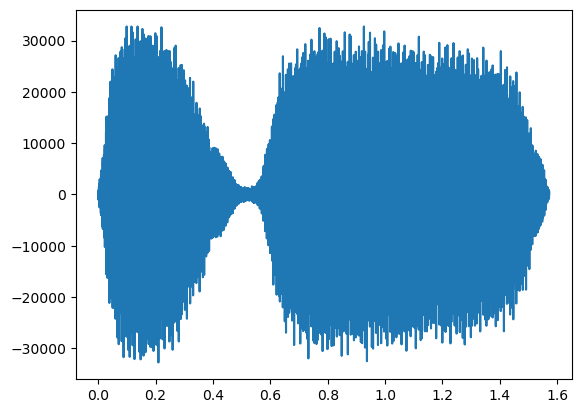

(100626, 100624, 50313)
(25157, 25156, 50313)


In [ ]:
from scipy.io import wavfile
# Assignment 1 - Playing and Plotting Time Scaled Audio Files 

# Part A
# 1. Read the train.wav file
samplerate, data = wavfile.read('train32.wav')
# 2. Print the sampling rate and shape of signal
num_samples = len(data)
duration = num_samples/samplerate
x_values = np.linspace(0, duration, num_samples)

plt.figure()
plt.plot(x_values, data)
plt.show()
# Part B
# 1. Use both timescale and linear_timescale functions above to resample the signal using value of "a" as 0.5 and 2.
samplerate, data = wavfile.read('train32.wav')
a1 = 0.5
a2 = 2
y1_1, t1_1 = timescale(data, samplerate, a1)
y1_2, t1_2 = linear_timescale(data, samplerate, a1)

print(f"{len(y1_1), len(y1_2), len(data)}")

y2_1, t2_1 = timescale(data, samplerate, a2)
y2_2, t2_2 = linear_timescale(data, samplerate, a2)


print(f"{len(y2_1), len(y2_2), len(data)}")


# 2. Store the files as train_(high/low)_poly.wav and train_(high/low)_linear.wav (Don't change the f_s while storing the files)
    
wavfile.write('train_low_linear.wav', samplerate, np.array(y1_2).astype(np.int16))
wavfile.write('train_high_linear.wav', samplerate, np.array(y2_2).astype(np.int16))


# Part C
# 1. Play the files

###  Discussion

Comment on how the audio changes when the incorrect sampling frequency is used.


## Assignment 2 -- Amplitude Operations on Signals

Again, following the guidelines in the Lab 1 template, start a new cell and write a script to meet the following specifications. This assignment will have three parts, A-C, each of which should be indicated with comments.  

**A.1.** Create a discrete time signal $s_1(t)$ that is the same length as $x_1(t)$ and has value 1 for t=[0,0.5] and value 0.2 for $t>0.5$.  

You can use the command below where $len$ is the length of $x_1(t)$ and $n_0$ is the index corresponding to t=0.5, 
s1 = np.concatenate((np.ones(n0),0.2*np.ones(len(x1)-n0)) 

**A.2.** Multiply x1 with s1 to create v1. Save this signal to a wav file. 

**B.1** Create a discrete-time decaying ramp signal r1, that is the same length as x1. The signal should have value 1 at time 0 and linearly decay to value 0.  (Hint: use numpy.arange.) 

**B.2** Multiply x1 with r1 to create v2. Save this signal to a wav file.  

**C.**  Read in v1 and v2 and play the two different modifications together with the original, to verify that the volume of the second whistle is reduced. 

Ensure to play all the signals for the TAs

In [3]:
# Assignment 2 - Amplitude Operations on Signals

samplerate, data = wavfile.read('train32.wav')

# Part A
# TODO: Code that solves A
# 1. Create a signal s1 which 1 from 0s to 0.5s and 0.2 from 0.5s onward

s1 = np.zeros(len(data))
half_second_idx = int(0.5 * samplerate)
s1[:half_second_idx] = 1
s1[half_second_idx:] = 0.2


# 2. Multiply s1 with x1 sample by sample to create v1
x1 = np.array(data)
v1 = x1*s1


# Part B
# TODO: Code that solves B
# 1. Create a signal r1 which goes down linearly from 1 to 0 across the length of the signal.
r1 = np.arange(1, 0, -1/len(x1))

# 2. Multiply r1 with x1 sample by sample to create v2
v2 = r1*x1

# Part C
# TODO: Code that solves C
# 1. Store and play v1 and v2
wavfile.write('v1.wav', samplerate, np.array(v1).astype(np.int16))
wavfile.write('v2.wav', samplerate, np.array(v2).astype(np.int16))


###  Discussion

Discuss the differences that the two modifications have on the signal. What would happen if you defined s1 to take value 2 for the [0,0.5] range? If you wanted a smooth but faster decay in amplitude, what signal might you use?  